In [1]:
import numpy as np
import pandas as pd
import sklearn

#load data
train =  pd.read_csv('train.csv',header=None,sep=' ')

X_train=train.drop(columns=[0, 257])
Y_train=train[0]
test = pd.read_csv('test.csv',header=None,sep=' ')
X_test=test.drop(columns=[0])
Y_test=test[0]

In [ ]:
# KNN method
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
k_list = list(range(1,50))
k_odd = filter(lambda x:x%2!=0,k_list)
cv_scores = []
for k in k_odd:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train, Y_train,cv=10,scoring='accuracy')
    score=scores.mean()
    cv_scores.append(score)
    #print('k=',k)
    #print('valid result:',score)

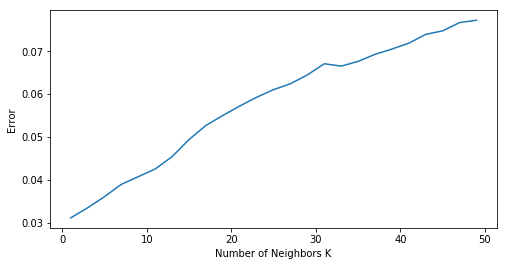

In [21]:
error=[1-x for x in cv_scores]
k = np.linspace(1,49,25)
plt.figure(figsize=(8,4))
plt.plot(k,error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Error of Valid data set')
plt.show()

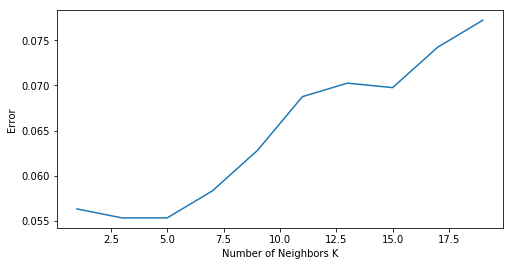

In [9]:
from sklearn.neighbors import KNeighborsClassifier
k_list = list(range(1,20))
k_odd = filter(lambda x:x%2!=0,k_list)
scores = []
for k in k_odd:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    scores.append(knn.score(X_test,Y_test))
error=[1-x for x in scores]
k = np.linspace(1,19,10)
plt.figure(figsize=(8,4))
plt.plot(k,error)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Error')
plt.show()

In [19]:
import math
# Gaussian method 

#convert dataFrame to np Array
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values

mu_x = np.mean(X_train,axis=0).reshape((256,1))
mu_y = np.mean(Y_train)
cov_x = np.cov(X_train.T)
inv_covx = np.linalg.inv(cov_x)
cov_xy_matrix = np.cov(X_train.T,Y_train)
cov_xy=cov_xy_matrix[256,0:256].reshape((1,256))
pred=[]
error_num=0
for i in range(2007):
    value=mu_y+np.dot(cov_xy,np.dot(inv_covx,(X_test[i,:].reshape((256,1))-mu_x)))
    if value<0: 
        value=0
    elif value>9: 
        value=9
    else: 
        value = round(value.item())
    if value!=Y_test[i]:
        error_num=error_num+1 
    pred.append(value)
    
print('accuracy of gaussian classifier:',1-(error_num/2007))

accuracy of gaussian classifier: 0.25460886895864476


In [26]:
# Naive Bayes Gaussian method
from sklearn.model_selection import cross_val_score
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split

gauss = naive_bayes.GaussianNB()
gauss.fit(X_train,Y_train)
Y_pred=gauss.predict(X_test)
print('\naccuracy of gaussian classifier:',gauss.score(X_test,Y_test))
print('\n mean of each feature per class:\n',gauss.theta_ )
print('\n variance of each feature per class:\n',gauss.sigma_,'\nshape:',gauss.sigma_.shape)
print('\naccuracy of gaussian classifier:',gauss.score(X_test,Y_test))

# using 10 fold cross validation
scores=cross_val_score(gauss, X_train, Y_train,cv=10,scoring='accuracy')
print('accuracy of cross validation for gaussian classifier:',np.mean(scores))

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train,Y_train, test_size=0.1)

def get_examples_for_class(class_id):
    examples = []
    for i, example in enumerate(X_train):
        if Y_train[i]==class_id:
            examples.append(example)
        
    examples = np.matrix(examples)
    return examples

mean = np.array(examples.mean(0))[0]
cov = np.cov(examples.T)
print('\ncovariance:\n',cov,'\nshape:',cov.shape)



accuracy of gaussian classifier: 0.6895864474339811

 mean of each feature per class:
 [[-0.99770266 -0.99581627 -0.98151332 ... -0.99686255 -0.99990042
  -1.        ]
 [-1.         -1.         -1.         ... -0.99922185 -1.
  -1.        ]
 [-0.99292944 -0.96547932 -0.91431873 ... -0.73825547 -0.826691
  -0.9453163 ]
 ...
 [-0.97744156 -0.8956987  -0.78992468 ... -1.         -1.
  -1.        ]
 [-0.9988693  -0.98309119 -0.94648328 ... -0.99458055 -0.99999392
  -1.        ]
 [-1.         -1.         -0.99807013 ... -0.99495844 -0.99822597
  -1.        ]]

 variance of each feature per class:
 [[3.75775812e-03 6.00750001e-03 2.39017261e-02 ... 6.63443343e-04
  7.06101395e-06 8.03749081e-10]
 [8.03749081e-10 8.03749081e-10 8.03749081e-10 ... 3.65123770e-04
  8.03749081e-10 8.03749081e-10]
 [4.64172089e-03 4.26010533e-02 1.08057444e-01 ... 3.00527456e-01
  2.04225202e-01 4.63297791e-02]
 ...
 [1.69203305e-02 1.27491666e-01 2.41021395e-01 ... 8.03749081e-10
  8.03749081e-10 8.03749081e-10